In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from google.colab import files

# Importing the dataset
uploaded=files.upload()



In [ ]:
import pandas as pd
import io
  
dataset = pd.read_csv(io.BytesIO(uploaded['position_salaries.csv']))
print(dataset)

In [42]:

#Train and test
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values





In [43]:
X


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [44]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [45]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

"""
# Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
"""

In [46]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_train_predict = lin_reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 182255.45082989548
R2 score is 0.624399196310701




In [48]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])
#output should be 249500



array([249500.])

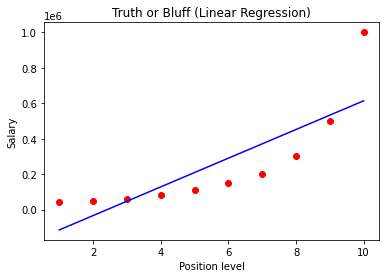

In [49]:


# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()



In [50]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [51]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))
#output should be 132148.43750003

array([132148.43750002])

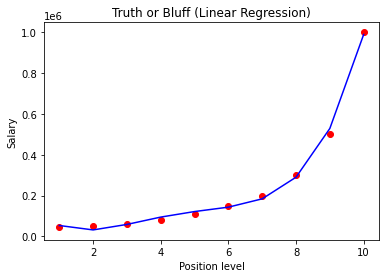

In [52]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

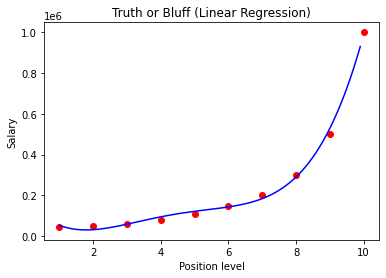

In [53]:
# Additional feature
# Making the plot line (Blue one) more smooth
def viz_polymonial_smooth():
    X_grid = np.arange(min(X), max(X), 0.1)
    X_grid = X_grid.reshape(len(X_grid), 1) #Why do we need to reshape? (https://www.tutorialspoint.com/numpy/numpy_reshape.htm)
    # Visualizing the Polymonial Regression results
    plt.scatter(X, y, color='red')
    plt.plot(X_grid, pol_reg.predict(poly_reg.fit_transform(X_grid)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial_smooth()
